<a href="https://colab.research.google.com/github/Ramseshu24221/minor_project/blob/main/minor2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image

In [ ]:
np.random.seed(42)
from sklearn.metrics import confusion_matrix

In [ ]:
pip install keras-utils

  Preparing metadata (setup.py) ... done
  Created wheel for keras-utils: filename=keras_utils-1.0.13-py3-none-any.whl size=2630 sha256=2e3a4eea7b9af06d1f6bd5b284c55c52d52dc8a653fdc138982c542eb00fb7ee
  Stored in directory: /root/.cache/pip/wheels/84/04/c8/f3d21e09aa3a1e25bc4a4fc07341ca073d7372f33dbd344a06
Successfully built keras-utils


In [ ]:
import keras
from keras.utils import to_categorical # used for converting labels to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Update the path to your file in Google Drive
skin_df = pd.read_csv('/content/drive/MyDrive/HAM10000/HAM10000_metadata.csv')


In [ ]:
skin_df

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face


In [ ]:
SIZE=32

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(skin_df['dx'])
skin_df['label'] = le.transform(skin_df['dx'])

print(skin_df.sample(5))


        lesion_id      image_id   dx    dx_type   age     sex  \
3697  HAM_0005218  ISIC_0028939   nv  follow_up  55.0  female   
7213  HAM_0007444  ISIC_0033989   nv      histo  50.0  female   
310   HAM_0002839  ISIC_0032280  bkl      histo  60.0  female   
4438  HAM_0005070  ISIC_0030863   nv  follow_up  55.0  female   
6087  HAM_0005969  ISIC_0028257   nv  follow_up  35.0    male   

         localization  label  
3697  lower extremity      5  
7213  lower extremity      5  
310   lower extremity      2  
4438            trunk      5  
6087          abdomen      5  


In [ ]:
LabelEncoder()

LabelEncoder()

In [ ]:
print(list(le.classes_))

['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']


In [ ]:
skin_df['label'] = le.transform(skin_df["dx"])

In [ ]:
print(skin_df.sample(10))

        lesion_id      image_id   dx    dx_type   age     sex  \
4236  HAM_0006349  ISIC_0024919   nv  follow_up  50.0  female   
5405  HAM_0000944  ISIC_0027864   nv  follow_up  75.0    male   
4034  HAM_0005042  ISIC_0026220   nv  follow_up  60.0  female   
7870  HAM_0006182  ISIC_0033789   nv      histo  35.0    male   
595   HAM_0002357  ISIC_0031783  bkl      histo  70.0    male   
6921  HAM_0003627  ISIC_0026497   nv      histo  30.0  female   
2034  HAM_0004171  ISIC_0024644  mel      histo  85.0  female   
2231  HAM_0005789  ISIC_0032204  mel      histo  55.0    male   
8370  HAM_0003113  ISIC_0024520   nv      histo  60.0    male   
4497  HAM_0000981  ISIC_0024311   nv  follow_up  75.0  female   

         localization  label  
4236            trunk      5  
5405  upper extremity      5  
4034  lower extremity      5  
7870          abdomen      5  
595              neck      2  
6921             back      5  
2034  lower extremity      4  
2231            chest      4  
8370 

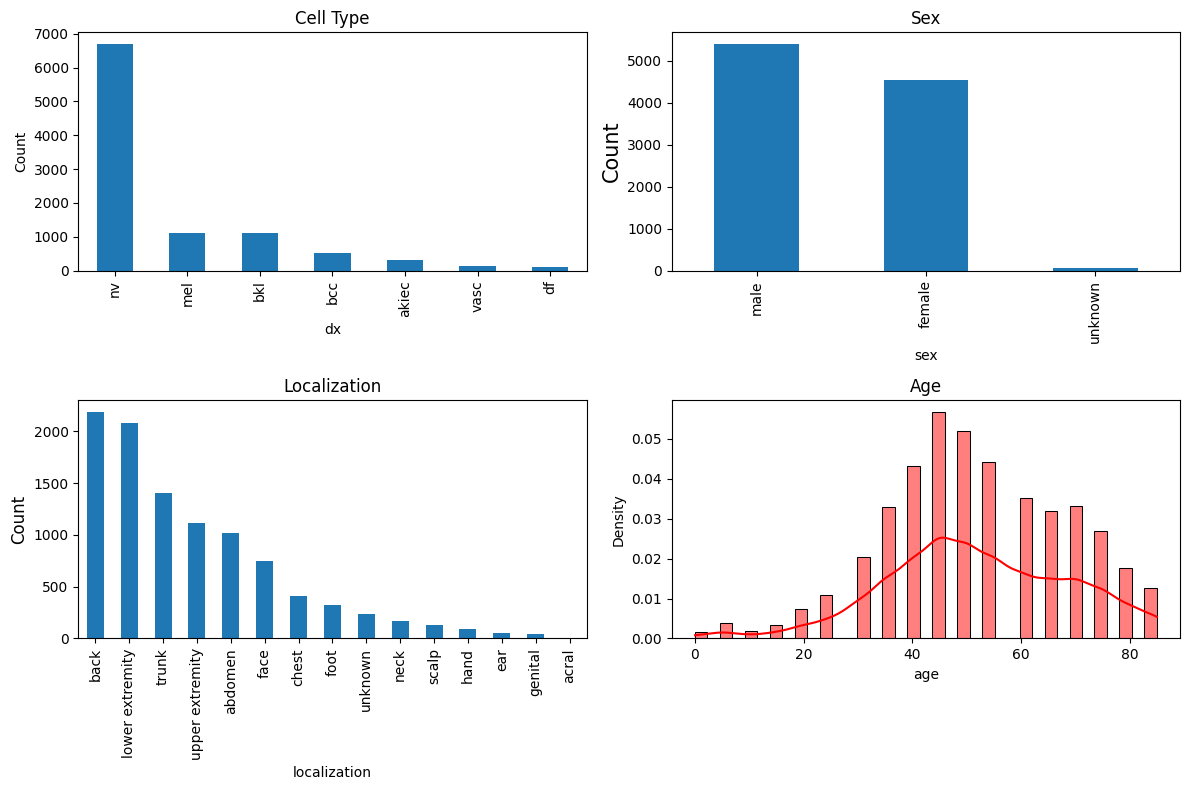

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Assuming you already have your skin_df loaded, otherwise load it here
# Example:
# skin_df = pd.read_csv('your_data.csv')

# Data distribution visualization
fig = plt.figure(figsize=(12,8))

# Plot 1: Cell Type
ax1 = fig.add_subplot(221)
skin_df['dx'].value_counts().plot(kind='bar', ax=ax1)
ax1.set_ylabel('Count')
ax1.set_title('Cell Type')

# Plot 2: Sex
ax2 = fig.add_subplot(222)
skin_df['sex'].value_counts().plot(kind='bar', ax=ax2)
ax2.set_ylabel('Count', size=15)
ax2.set_title('Sex')

# Plot 3: Localization
ax3 = fig.add_subplot(223)
skin_df['localization'].value_counts().plot(kind='bar', ax=ax3)
ax3.set_ylabel('Count', size=12)
ax3.set_title('Localization')

# Plot 4: Age distribution
ax4 = fig.add_subplot(224)
sample_age = skin_df[pd.notnull(skin_df['age'])]
sns.histplot(sample_age['age'], kde=True, stat="density", color='red', ax=ax4)
ax4.set_title('Age')

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.utils import resample

In [ ]:
# Distribution of data into various classes
print(skin_df['label'].value_counts())

label
5    6705
4    1113
2    1099
1     514
0     327
6     142
3     115
Name: count, dtype: int64


In [ ]:
df_0 = skin_df[skin_df['label'] == 0]
df_1 = skin_df[skin_df['label'] == 1]
df_2 = skin_df[skin_df['label'] == 2]
df_3 = skin_df[skin_df['label'] == 3]
df_4 = skin_df[skin_df['label'] == 4]
df_5 = skin_df[skin_df['label'] == 5]
df_6 = skin_df[skin_df['label'] == 6]

In [ ]:
df_0

,lesion_id,image_id,dx,dx_type,age,sex,localization,label
9687,HAM_0002644,ISIC_0029417,akiec,histo,80.0,female,neck,0
9688,HAM_0006002,ISIC_0029915,akiec,histo,50.0,female,face,0
9689,HAM_0000549,ISIC_0029360,akiec,histo,70.0,male,upper extremity,0
9690,HAM_0000549,ISIC_0026152,akiec,histo,70.0,male,upper extremity,0
9691,HAM_0000673,ISIC_0029659,akiec,histo,70.0,female,face,0
...,...,...,...,...,...,...,...,...
10009,HAM_0005705,ISIC_0031430,akiec,histo,75.0,female,lower extremity,0
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,0
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,0
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,0


In [ ]:
df_1

,lesion_id,image_id,dx,dx_type,age,sex,localization,label
2462,HAM_0000781,ISIC_0028155,bcc,histo,50.0,male,back,1
2463,HAM_0003220,ISIC_0034093,bcc,histo,80.0,female,face,1
2464,HAM_0007141,ISIC_0029230,bcc,histo,50.0,male,trunk,1
2465,HAM_0007141,ISIC_0031513,bcc,histo,50.0,male,trunk,1
2466,HAM_0007009,ISIC_0032384,bcc,histo,50.0,male,back,1
...,...,...,...,...,...,...,...,...
2971,HAM_0001573,ISIC_0028542,bcc,histo,45.0,male,chest,1
2972,HAM_0001215,ISIC_0025260,bcc,histo,70.0,male,back,1
2973,HAM_0001215,ISIC_0031531,bcc,histo,70.0,male,back,1
2974,HAM_0005026,ISIC_0028978,bcc,histo,40.0,female,abdomen,1


In [ ]:
df_2

,lesion_id,image_id,dx,dx_type,age,sex,localization,label
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,2
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,2
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,2
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,2
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,2
...,...,...,...,...,...,...,...,...
3326,HAM_0002276,ISIC_0025366,bkl,consensus,50.0,female,trunk,2
7100,HAM_0006159,ISIC_0028977,bkl,consensus,50.0,female,upper extremity,2
9546,HAM_0003807,ISIC_0032655,bkl,consensus,40.0,male,unknown,2
9630,HAM_0003807,ISIC_0033620,bkl,consensus,40.0,male,unknown,2


In [ ]:
df_3

,lesion_id,image_id,dx,dx_type,age,sex,localization,label
1095,HAM_0005276,ISIC_0027008,df,histo,75.0,male,back,3
1096,HAM_0005276,ISIC_0028790,df,histo,75.0,male,back,3
1097,HAM_0004103,ISIC_0028880,df,histo,55.0,male,lower extremity,3
1098,HAM_0004103,ISIC_0031309,df,histo,55.0,male,lower extremity,3
1099,HAM_0001164,ISIC_0030021,df,histo,50.0,female,upper extremity,3
...,...,...,...,...,...,...,...,...
1205,HAM_0007569,ISIC_0025373,df,consensus,35.0,female,lower extremity,3
1206,HAM_0001841,ISIC_0025771,df,consensus,35.0,female,lower extremity,3
1207,HAM_0006707,ISIC_0030870,df,consensus,45.0,female,lower extremity,3
1208,HAM_0002153,ISIC_0029297,df,consensus,40.0,female,lower extremity,3


In [ ]:
df_4

,lesion_id,image_id,dx,dx_type,age,sex,localization,label
1211,HAM_0000871,ISIC_0025964,mel,histo,40.0,female,chest,4
1212,HAM_0000871,ISIC_0030623,mel,histo,40.0,female,chest,4
1213,HAM_0000040,ISIC_0027190,mel,histo,80.0,male,upper extremity,4
1214,HAM_0005678,ISIC_0031023,mel,histo,60.0,male,chest,4
1215,HAM_0005678,ISIC_0028086,mel,histo,60.0,male,chest,4
...,...,...,...,...,...,...,...,...
2319,HAM_0001953,ISIC_0025611,mel,histo,65.0,male,back,4
6769,HAM_0002552,ISIC_0032985,mel,histo,25.0,male,upper extremity,4
8820,HAM_0002552,ISIC_0032936,mel,histo,25.0,male,upper extremity,4
8834,HAM_0002552,ISIC_0033232,mel,histo,25.0,male,upper extremity,4


In [ ]:
df_5

,lesion_id,image_id,dx,dx_type,age,sex,localization,label
64,HAM_0001751,ISIC_0024698,nv,consensus,70.0,male,face,5
1210,HAM_0000559,ISIC_0024693,nv,follow_up,45.0,female,upper extremity,5
2976,HAM_0004932,ISIC_0032212,nv,follow_up,45.0,female,foot,5
2977,HAM_0004516,ISIC_0025775,nv,follow_up,45.0,female,neck,5
2978,HAM_0006510,ISIC_0029828,nv,follow_up,55.0,female,lower extremity,5
...,...,...,...,...,...,...,...,...
9682,HAM_0006283,ISIC_0027924,nv,consensus,20.0,male,chest,5
9683,HAM_0000102,ISIC_0031547,nv,consensus,20.0,male,back,5
9684,HAM_0000102,ISIC_0032221,nv,consensus,20.0,male,back,5
9685,HAM_0005314,ISIC_0030693,nv,consensus,40.0,male,neck,5


In [ ]:
df_6

,lesion_id,image_id,dx,dx_type,age,sex,localization,label
2320,HAM_0006889,ISIC_0031197,vasc,histo,20.0,male,upper extremity,6
2321,HAM_0006889,ISIC_0031270,vasc,histo,20.0,male,upper extremity,6
2322,HAM_0001920,ISIC_0029486,vasc,histo,55.0,male,back,6
2323,HAM_0001920,ISIC_0031901,vasc,histo,55.0,male,back,6
2324,HAM_0005155,ISIC_0032076,vasc,histo,85.0,male,lower extremity,6
...,...,...,...,...,...,...,...,...
2457,HAM_0000415,ISIC_0025680,vasc,consensus,55.0,female,trunk,6
2458,HAM_0004413,ISIC_0026068,vasc,consensus,55.0,female,abdomen,6
2459,HAM_0004257,ISIC_0025452,vasc,consensus,55.0,female,abdomen,6
2460,HAM_0003829,ISIC_0026349,vasc,consensus,60.0,female,trunk,6


In [ ]:
n_samples=500

In [ ]:
df_0_balanced = resample(df_0, replace=True, n_samples=n_samples, random_state=42)
df_1_balanced = resample(df_1, replace=True, n_samples=n_samples, random_state=42)
df_2_balanced = resample(df_2, replace=True, n_samples=n_samples, random_state=42)
df_3_balanced = resample(df_3, replace=True, n_samples=n_samples, random_state=42)
df_4_balanced = resample(df_4, replace=True, n_samples=n_samples, random_state=42)
df_5_balanced = resample(df_5, replace=True, n_samples=n_samples, random_state=42)
df_6_balanced = resample(df_6, replace=True, n_samples=n_samples, random_state=42)

In [ ]:
df_0_balanced

,lesion_id,image_id,dx,dx_type,age,sex,localization,label
9789,HAM_0003136,ISIC_0026645,akiec,histo,65.0,male,back,0
9957,HAM_0006587,ISIC_0025780,akiec,histo,70.0,male,face,0
9793,HAM_0005505,ISIC_0024450,akiec,histo,50.0,male,upper extremity,0
9758,HAM_0003455,ISIC_0027896,akiec,histo,75.0,male,hand,0
9875,HAM_0005459,ISIC_0029268,akiec,histo,85.0,male,upper extremity,0
...,...,...,...,...,...,...,...,...
9837,HAM_0003262,ISIC_0026212,akiec,histo,45.0,male,face,0
9876,HAM_0003401,ISIC_0029598,akiec,histo,55.0,male,face,0
9910,HAM_0005024,ISIC_0025803,akiec,histo,80.0,male,face,0
9723,HAM_0005310,ISIC_0027231,akiec,histo,85.0,male,back,0


In [ ]:
df_1_balanced

,lesion_id,image_id,dx,dx_type,age,sex,localization,label
2564,HAM_0001907,ISIC_0025513,bcc,histo,40.0,male,back,1
2897,HAM_0006904,ISIC_0027281,bcc,histo,70.0,male,back,1
2732,HAM_0004027,ISIC_0024595,bcc,histo,65.0,female,back,1
2568,HAM_0006384,ISIC_0031272,bcc,histo,80.0,male,face,1
2533,HAM_0005921,ISIC_0030800,bcc,histo,75.0,male,lower extremity,1
...,...,...,...,...,...,...,...,...
2469,HAM_0006834,ISIC_0029193,bcc,histo,85.0,male,face,1
2583,HAM_0006572,ISIC_0030349,bcc,histo,75.0,male,back,1
2809,HAM_0002083,ISIC_0024432,bcc,histo,65.0,male,face,1
2551,HAM_0001326,ISIC_0031824,bcc,histo,60.0,male,scalp,1


In [ ]:
df_2_balanced

,lesion_id,image_id,dx,dx_type,age,sex,localization,label
861,HAM_0005580,ISIC_0029235,bkl,consensus,80.0,male,face,2
7100,HAM_0006159,ISIC_0028977,bkl,consensus,50.0,female,upper extremity,2
1045,HAM_0005751,ISIC_0028386,bkl,consensus,50.0,female,upper extremity,2
122,HAM_0000344,ISIC_0032972,bkl,histo,55.0,male,trunk,2
467,HAM_0005935,ISIC_0026679,bkl,histo,70.0,female,chest,2
...,...,...,...,...,...,...,...,...
46,HAM_0002299,ISIC_0025819,bkl,histo,75.0,female,face,2
656,HAM_0003938,ISIC_0030231,bkl,histo,55.0,female,upper extremity,2
471,HAM_0000744,ISIC_0029474,bkl,histo,70.0,male,face,2
971,HAM_0000948,ISIC_0033631,bkl,consensus,NaN,unknown,unknown,2


In [ ]:
df_2_balanced

,lesion_id,image_id,dx,dx_type,age,sex,localization,label
861,HAM_0005580,ISIC_0029235,bkl,consensus,80.0,male,face,2
7100,HAM_0006159,ISIC_0028977,bkl,consensus,50.0,female,upper extremity,2
1045,HAM_0005751,ISIC_0028386,bkl,consensus,50.0,female,upper extremity,2
122,HAM_0000344,ISIC_0032972,bkl,histo,55.0,male,trunk,2
467,HAM_0005935,ISIC_0026679,bkl,histo,70.0,female,chest,2
...,...,...,...,...,...,...,...,...
46,HAM_0002299,ISIC_0025819,bkl,histo,75.0,female,face,2
656,HAM_0003938,ISIC_0030231,bkl,histo,55.0,female,upper extremity,2
471,HAM_0000744,ISIC_0029474,bkl,histo,70.0,male,face,2
971,HAM_0000948,ISIC_0033631,bkl,consensus,NaN,unknown,unknown,2


In [ ]:
df_3_balanced

,lesion_id,image_id,dx,dx_type,age,sex,localization,label
1197,HAM_0004065,ISIC_0026629,df,consensus,65.0,female,lower extremity,3
1146,HAM_0005861,ISIC_0028346,df,histo,65.0,female,lower extremity,3
1187,HAM_0006787,ISIC_0026471,df,consensus,60.0,male,lower extremity,3
1109,HAM_0005518,ISIC_0032410,df,histo,30.0,male,lower extremity,3
1201,HAM_0000049,ISIC_0029130,df,consensus,70.0,male,lower extremity,3
...,...,...,...,...,...,...,...,...
1109,HAM_0005518,ISIC_0032410,df,histo,30.0,male,lower extremity,3
1186,HAM_0006816,ISIC_0026254,df,consensus,45.0,male,lower extremity,3
1192,HAM_0004496,ISIC_0028651,df,consensus,55.0,female,lower extremity,3
1160,HAM_0002450,ISIC_0024396,df,consensus,65.0,female,lower extremity,3


In [ ]:
df_4_balanced

,lesion_id,image_id,dx,dx_type,age,sex,localization,label
2071,HAM_0002523,ISIC_0024516,mel,histo,40.0,male,back,4
2306,HAM_0001910,ISIC_0028968,mel,histo,55.0,male,upper extremity,4
2255,HAM_0001953,ISIC_0031498,mel,histo,65.0,male,back,4
1332,HAM_0005588,ISIC_0026458,mel,histo,80.0,female,lower extremity,4
1677,HAM_0007086,ISIC_0033863,mel,histo,65.0,female,back,4
...,...,...,...,...,...,...,...,...
2025,HAM_0006497,ISIC_0027302,mel,histo,35.0,female,lower extremity,4
1290,HAM_0002714,ISIC_0026113,mel,histo,50.0,male,abdomen,4
2096,HAM_0002609,ISIC_0032070,mel,histo,60.0,female,back,4
1413,HAM_0002981,ISIC_0028087,mel,histo,65.0,female,back,4


In [ ]:
df_5_balanced

,lesion_id,image_id,dx,dx_type,age,sex,localization,label
3835,HAM_0000474,ISIC_0030099,nv,follow_up,45.0,female,hand,5
8367,HAM_0000597,ISIC_0030654,nv,histo,35.0,female,abdomen,5
8203,HAM_0007585,ISIC_0032347,nv,histo,35.0,female,back,5
8168,HAM_0005902,ISIC_0027285,nv,histo,40.0,female,foot,5
6747,HAM_0004380,ISIC_0026251,nv,histo,30.0,female,face,5
...,...,...,...,...,...,...,...,...
3966,HAM_0004634,ISIC_0032454,nv,follow_up,65.0,male,trunk,5
7119,HAM_0007541,ISIC_0032691,nv,histo,30.0,male,abdomen,5
7341,HAM_0006391,ISIC_0032821,nv,histo,70.0,female,lower extremity,5
7442,HAM_0000747,ISIC_0034044,nv,histo,30.0,male,trunk,5


In [ ]:
df_6_balanced

,lesion_id,image_id,dx,dx_type,age,sex,localization,label
2422,HAM_0006796,ISIC_0025707,vasc,consensus,35.0,male,trunk,6
2412,HAM_0000934,ISIC_0031706,vasc,consensus,60.0,male,trunk,6
2334,HAM_0002218,ISIC_0025578,vasc,histo,5.0,male,back,6
2426,HAM_0005215,ISIC_0028406,vasc,consensus,80.0,male,abdomen,6
2391,HAM_0001566,ISIC_0031346,vasc,consensus,70.0,female,face,6
...,...,...,...,...,...,...,...,...
2375,HAM_0005989,ISIC_0033123,vasc,histo,25.0,female,back,6
2436,HAM_0004943,ISIC_0027790,vasc,consensus,50.0,female,face,6
2453,HAM_0001038,ISIC_0024706,vasc,consensus,50.0,male,trunk,6
2377,HAM_0007097,ISIC_0033762,vasc,histo,60.0,male,trunk,6


In [ ]:
skin_df_balanced = pd.concat([df_0_balanced, df_1_balanced,
                              df_2_balanced, df_3_balanced,
                              df_4_balanced, df_5_balanced, df_6_balanced])

In [ ]:
skin_df_balanced

,lesion_id,image_id,dx,dx_type,age,sex,localization,label
9789,HAM_0003136,ISIC_0026645,akiec,histo,65.0,male,back,0
9957,HAM_0006587,ISIC_0025780,akiec,histo,70.0,male,face,0
9793,HAM_0005505,ISIC_0024450,akiec,histo,50.0,male,upper extremity,0
9758,HAM_0003455,ISIC_0027896,akiec,histo,75.0,male,hand,0
9875,HAM_0005459,ISIC_0029268,akiec,histo,85.0,male,upper extremity,0
...,...,...,...,...,...,...,...,...
2375,HAM_0005989,ISIC_0033123,vasc,histo,25.0,female,back,6
2436,HAM_0004943,ISIC_0027790,vasc,consensus,50.0,female,face,6
2453,HAM_0001038,ISIC_0024706,vasc,consensus,50.0,male,trunk,6
2377,HAM_0007097,ISIC_0033762,vasc,histo,60.0,male,trunk,6


In [ ]:
print(skin_df_balanced['label'].value_counts())

label
0    500
1    500
2    500
3    500
4    500
5    500
6    500
Name: count, dtype: int64


In [ ]:
image_dir = '/content/drive/MyDrive/ham10000/images/'

# Create a dictionary to map image IDs to file paths
image_path = {os.path.splitext(os.path.basename(x))[0]: x
              for x in glob(os.path.join(image_dir, '*.jpg'))}

In [ ]:
image_path

{'ISIC_0026213': '/content/drive/MyDrive/ham10000/images/ISIC_0026213.jpg',
 'ISIC_0028731': '/content/drive/MyDrive/ham10000/images/ISIC_0028731.jpg',
 'ISIC_0031370': '/content/drive/MyDrive/ham10000/images/ISIC_0031370.jpg',
 'ISIC_0027719': '/content/drive/MyDrive/ham10000/images/ISIC_0027719.jpg',
 'ISIC_0033755': '/content/drive/MyDrive/ham10000/images/ISIC_0033755.jpg',
 'ISIC_0024504': '/content/drive/MyDrive/ham10000/images/ISIC_0024504.jpg',
 'ISIC_0027992': '/content/drive/MyDrive/ham10000/images/ISIC_0027992.jpg',
 'ISIC_0027674': '/content/drive/MyDrive/ham10000/images/ISIC_0027674.jpg',
 'ISIC_0032090': '/content/drive/MyDrive/ham10000/images/ISIC_0032090.jpg',
 'ISIC_0026376': '/content/drive/MyDrive/ham10000/images/ISIC_0026376.jpg',
 'ISIC_0027207': '/content/drive/MyDrive/ham10000/images/ISIC_0027207.jpg',
 'ISIC_0026673': '/content/drive/MyDrive/ham10000/images/ISIC_0026673.jpg',
 'ISIC_0026702': '/content/drive/MyDrive/ham10000/images/ISIC_0026702.jpg',
 'ISIC_00304

In [ ]:
#Define the path and add as a new column
skin_df_balanced['path'] = skin_df['image_id'].map(image_path.get)

In [ ]:
#Use the path to read images.
skin_df_balanced['image'] = skin_df_balanced['path'].map(lambda x: np.asarray(Image.open(x).resize((SIZE,SIZE))))

In [ ]:
skin_df_balanced['path']

,path
9789,/content/drive/MyDrive/ham10000/images/ISIC_00...
9957,/content/drive/MyDrive/ham10000/images/ISIC_00...
9793,/content/drive/MyDrive/ham10000/images/ISIC_00...
9758,/content/drive/MyDrive/ham10000/images/ISIC_00...
9875,/content/drive/MyDrive/ham10000/images/ISIC_00...
...,...
2375,/content/drive/MyDrive/ham10000/images/ISIC_00...
2436,/content/drive/MyDrive/ham10000/images/ISIC_00...
2453,/content/drive/MyDrive/ham10000/images/ISIC_00...
2377,/content/drive/MyDrive/ham10000/images/ISIC_00...


In [ ]:
skin_df_balanced['image']

,image
9789,"[[[155, 118, 107], [162, 126, 118], [174, 140,..."
9957,"[[[138, 76, 82], [131, 64, 68], [139, 73, 81],..."
9793,"[[[123, 86, 87], [174, 137, 137], [197, 161, 1..."
9758,"[[[205, 149, 175], [207, 149, 169], [214, 158,..."
9875,"[[[203, 174, 199], [205, 174, 197], [206, 175,..."
...,...
2375,"[[[15, 12, 12], [40, 30, 32], [87, 67, 71], [1..."
2436,"[[[148, 109, 118], [121, 93, 102], [112, 87, 9..."
2453,"[[[248, 181, 199], [248, 183, 201], [248, 186,..."
2377,"[[[180, 133, 143], [189, 147, 158], [192, 150,..."


In [ ]:
skin_df_balanced

,lesion_id,image_id,dx,dx_type,age,sex,localization,label,path,image
9789,HAM_0003136,ISIC_0026645,akiec,histo,65.0,male,back,0,/content/drive/MyDrive/ham10000/images/ISIC_00...,"[[[155, 118, 107], [162, 126, 118], [174, 140,..."
9957,HAM_0006587,ISIC_0025780,akiec,histo,70.0,male,face,0,/content/drive/MyDrive/ham10000/images/ISIC_00...,"[[[138, 76, 82], [131, 64, 68], [139, 73, 81],..."
9793,HAM_0005505,ISIC_0024450,akiec,histo,50.0,male,upper extremity,0,/content/drive/MyDrive/ham10000/images/ISIC_00...,"[[[123, 86, 87], [174, 137, 137], [197, 161, 1..."
9758,HAM_0003455,ISIC_0027896,akiec,histo,75.0,male,hand,0,/content/drive/MyDrive/ham10000/images/ISIC_00...,"[[[205, 149, 175], [207, 149, 169], [214, 158,..."
9875,HAM_0005459,ISIC_0029268,akiec,histo,85.0,male,upper extremity,0,/content/drive/MyDrive/ham10000/images/ISIC_00...,"[[[203, 174, 199], [205, 174, 197], [206, 175,..."
...,...,...,...,...,...,...,...,...,...,...
2375,HAM_0005989,ISIC_0033123,vasc,histo,25.0,female,back,6,/content/drive/MyDrive/ham10000/images/ISIC_00...,"[[[15, 12, 12], [40, 30, 32], [87, 67, 71], [1..."
2436,HAM_0004943,ISIC_0027790,vasc,consensus,50.0,female,face,6,/content/drive/MyDrive/ham10000/images/ISIC_00...,"[[[148, 109, 118], [121, 93, 102], [112, 87, 9..."
2453,HAM_0001038,ISIC_0024706,vasc,consensus,50.0,male,trunk,6,/content/drive/MyDrive/ham10000/images/ISIC_00...,"[[[248, 181, 199], [248, 183, 201], [248, 186,..."
2377,HAM_0007097,ISIC_0033762,vasc,histo,60.0,male,trunk,6,/content/drive/MyDrive/ham10000/images/ISIC_00...,"[[[180, 133, 143], [189, 147, 158], [192, 150,..."


In [ ]:
n_samples = 5  # number of samples for plotting

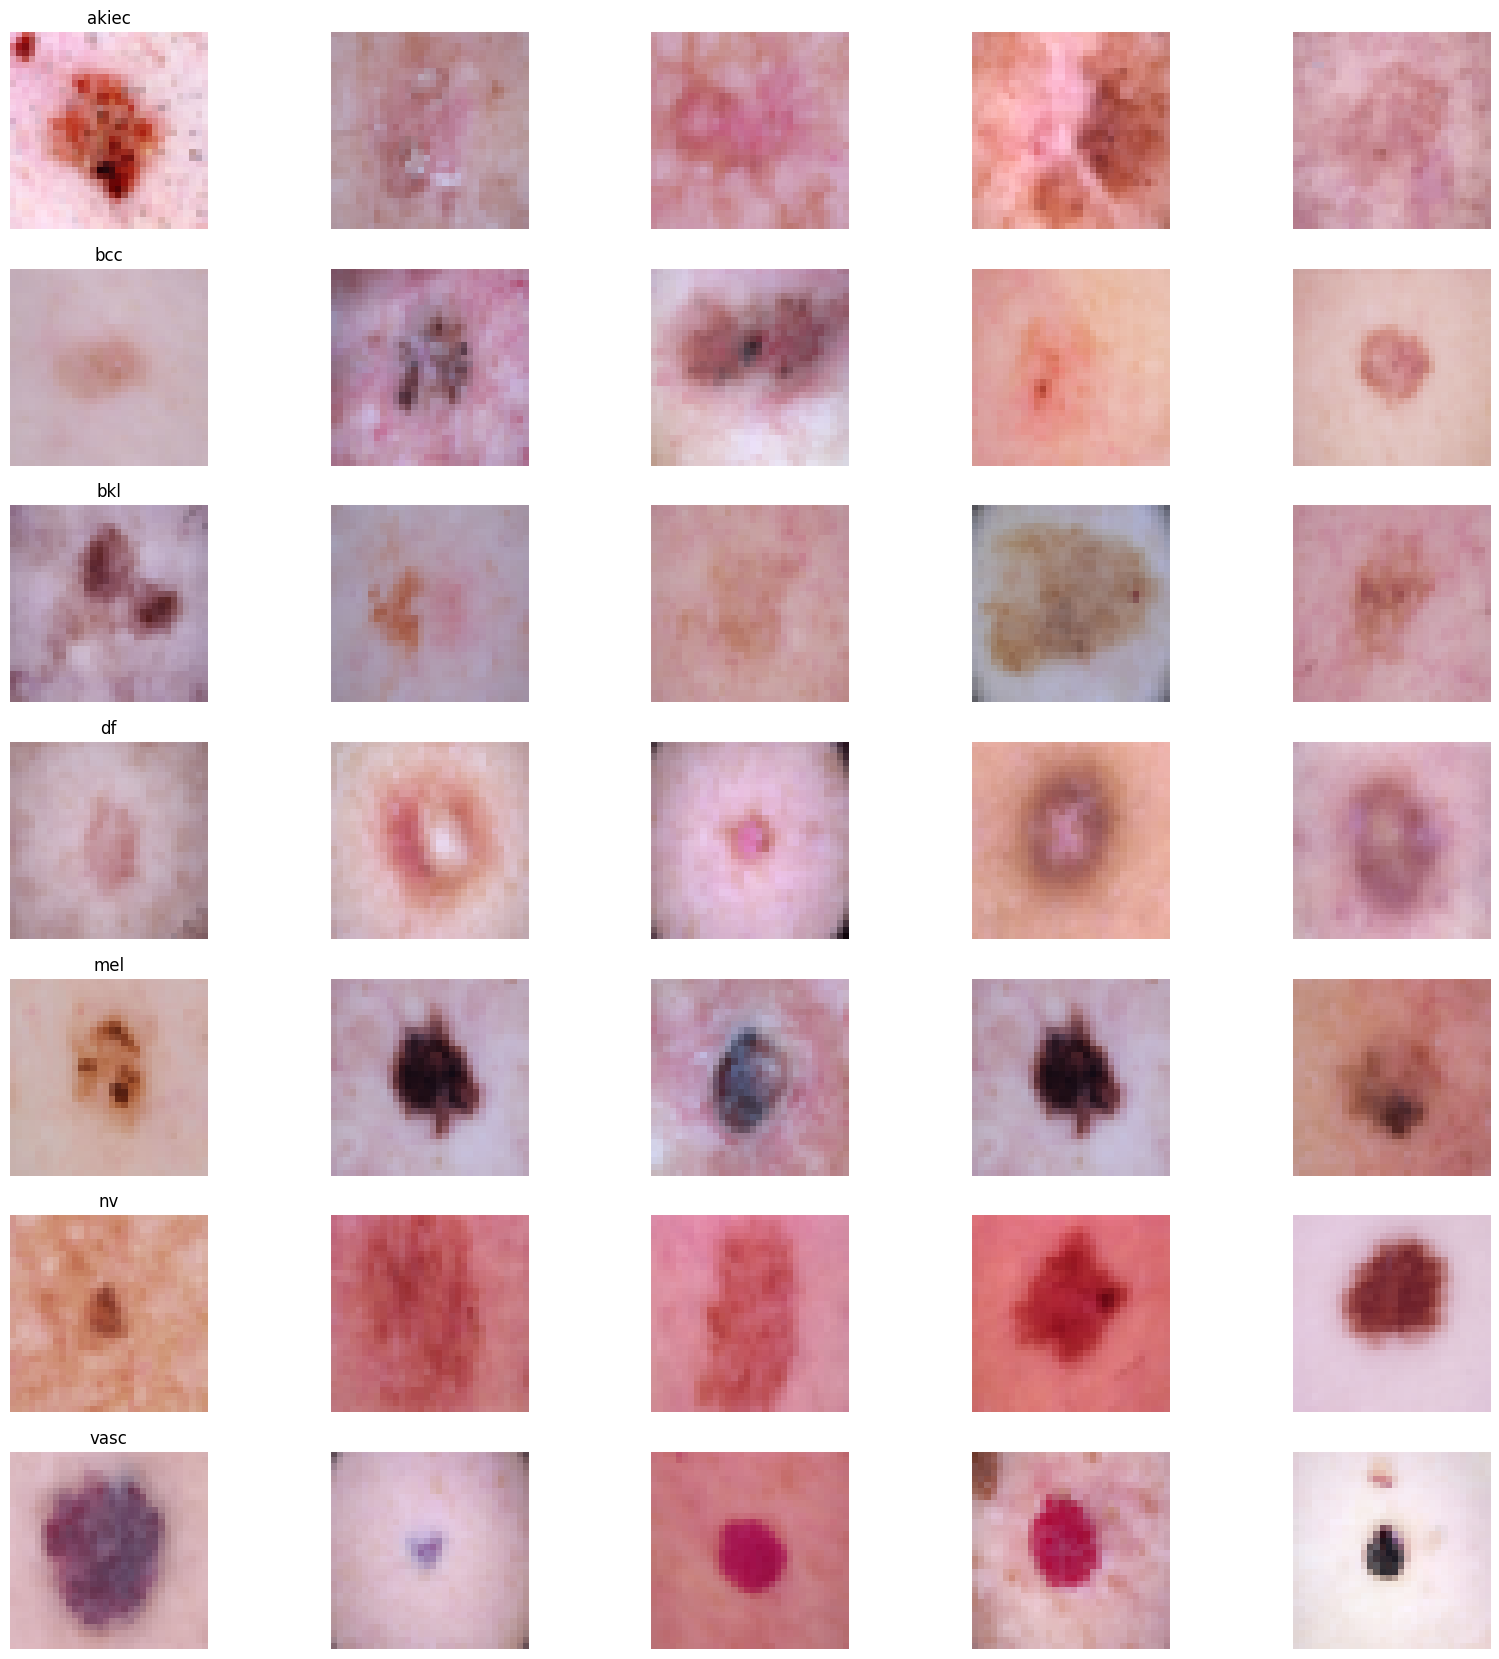

In [ ]:
fig, m_axs = plt.subplots(7, n_samples, figsize = (4*n_samples, 3*7))
for n_axs, (type_name, type_rows) in zip(m_axs,
                                         skin_df_balanced.sort_values(['dx']).groupby('dx')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=1234).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')

In [ ]:
#Convert dataframe column of images into numpy array
X = np.asarray(skin_df_balanced['image'].tolist())
X = X/255.  # Scale values to 0-1. You can also used standardscaler or other scaling methods.

In [ ]:
from tensorflow.keras.utils import to_categorical  # <-- Add this line

Y = skin_df_balanced['label']  # Assign label values to Y
Y_cat = to_categorical(Y, num_classes=7)  # Convert to categorical


In [ ]:
X

array([[[[0.60784314, 0.4627451 , 0.41960784],
         [0.63529412, 0.49411765, 0.4627451 ],
         [0.68235294, 0.54901961, 0.54117647],
         ...,
         [0.62352941, 0.4627451 , 0.40392157],
         [0.63137255, 0.50196078, 0.47058824],
         [0.53333333, 0.43137255, 0.40784314]],

        [[0.57647059, 0.41960784, 0.36470588],
         [0.61176471, 0.45882353, 0.41176471],
         [0.66666667, 0.52156863, 0.50196078],
         ...,
         [0.6745098 , 0.52156863, 0.4745098 ],
         [0.69019608, 0.56078431, 0.52156863],
         [0.6745098 , 0.56862745, 0.54509804]],

        [[0.64705882, 0.51372549, 0.48235294],
         [0.61176471, 0.45098039, 0.39215686],
         [0.61176471, 0.44313725, 0.40392157],
         ...,
         [0.6745098 , 0.52156863, 0.45882353],
         [0.65490196, 0.50980392, 0.44313725],
         [0.63137255, 0.50588235, 0.48235294]],

        ...,

        [[0.56470588, 0.42352941, 0.35294118],
         [0.58823529, 0.45098039, 0.37254902]

In [ ]:
from sklearn.model_selection import train_test_split  # <-- Add this

# Split into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, Y_cat, test_size=0.25, random_state=42)


In [ ]:
Y_cat

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
# --- IMPORTS ---
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense

# --- MODEL BUILDING ---
num_classes = 7
SIZE = 32  # Set your image size, example 32 if your images are 32x32x3

model = Sequential()
model.add(Conv2D(256, (3, 3), activation="relu", input_shape=(SIZE, SIZE, 3)))
# model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(32))
model.add(Dense(num_classes, activation='softmax'))  # use num_classes variable

model.summary()

# --- COMPILE ---
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['acc'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 256)    │         7,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 128)    │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 384,455 (1.47 MB)

 Trainable params: 384,455 (1.47 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
batch_size = 16
epochs = 10

In [ ]:
history = model.fit(
    x_train, y_train,
    epochs=epochs,
    batch_size = batch_size,
    validation_data=(x_test, y_test),
    verbose=2)

Epoch 1/50
165/165 - 42s - 253ms/step - acc: 0.1916 - loss: 1.9228 - val_acc: 0.2389 - val_loss: 1.8490
Epoch 2/50
165/165 - 34s - 205ms/step - acc: 0.2568 - loss: 1.7842 - val_acc: 0.2697 - val_loss: 1.7244
Epoch 3/50
165/165 - 31s - 186ms/step - acc: 0.3413 - loss: 1.6047 - val_acc: 0.3383 - val_loss: 1.6401
Epoch 4/50
165/165 - 31s - 186ms/step - acc: 0.3756 - loss: 1.4969 - val_acc: 0.4137 - val_loss: 1.4568
Epoch 5/50
165/165 - 41s - 248ms/step - acc: 0.4309 - loss: 1.4325 - val_acc: 0.4549 - val_loss: 1.3796
Epoch 6/50
165/165 - 34s - 207ms/step - acc: 0.4690 - loss: 1.3589 - val_acc: 0.4469 - val_loss: 1.3726
Epoch 7/50
165/165 - 31s - 190ms/step - acc: 0.4686 - loss: 1.3543 - val_acc: 0.4754 - val_loss: 1.3486
Epoch 8/50
165/165 - 31s - 187ms/step - acc: 0.5131 - loss: 1.2841 - val_acc: 0.4994 - val_loss: 1.2616
Epoch 9/50
165/165 - 41s - 246ms/step - acc: 0.4987 - loss: 1.2903 - val_acc: 0.4857 - val_loss: 1.2818
Epoch 10/50
165/165 - 41s - 251ms/step - acc: 0.5112 - loss: 1.2

In [ ]:
#score = model.evaluate(x_test, y_test)
#print('Test accuracy:', score[1] * 100, '%')
# 1. Evaluate the model on the test data
# --- SETTINGS ---
batch_size = 16
epochs = 10

# --- TRAINING ---
history = model.fit(
    x_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(x_test, y_test),
    verbose=2
)
score = model.evaluate(x_test, y_test)
print(f'Test accuracy: {score[1] * 100:.2f} %')

# --- SAVE MODEL ---
save_path = '/content/drive/MyDrive/disease.h5'  # Google Drive path
model.save(save_path)
print(f"Model saved at {save_path} ✅")

# 2. Save the model as 'disease.h5'
model.save('/content/drive/MyDrive/disease.h5')


28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 132ms/step - acc: 0.1591 - loss: 1.9456
Test accuracy: 16.46 %
Epoch 1/10
165/165 - 36s - 219ms/step - acc: 0.2076 - loss: 1.8650 - val_acc: 0.2674 - val_loss: 1.8009
Epoch 2/10
165/165 - 37s - 226ms/step - acc: 0.2922 - loss: 1.7081 - val_acc: 0.3189 - val_loss: 1.6290
Epoch 3/10
165/165 - 42s - 256ms/step - acc: 0.3821 - loss: 1.5189 - val_acc: 0.3623 - val_loss: 1.5245
Epoch 4/10
165/165 - 33s - 202ms/step - acc: 0.4343 - loss: 1.4373 - val_acc: 0.4354 - val_loss: 1.3989
Epoch 5/10
165/165 - 39s - 234ms/step - acc: 0.4560 - loss: 1.3832 - val_acc: 0.4491 - val_loss: 1.3738
Epoch 6/10
165/165 - 34s - 204ms/step - acc: 0.4762 - loss: 1.3527 - val_acc: 0.4286 - val_loss: 1.3859
Epoch 7/10
165/165 - 39s - 236ms/step - acc: 0.4834 - loss: 1.3389 - val_acc: 0.4069 - val_loss: 1.4131
Epoch 8/10
165/165 - 40s - 244ms/step - acc: 0.4994 - loss: 1.2797 - val_acc: 0.4549 - val_loss: 1.3375
Epoch 9/10
165/165 - 41s - 249ms/step - acc: 0.5055 - loss: 1.2708 - val_ac

Model saved at /content/drive/MyDrive/disease.h5 ✅


In [ ]:
import streamlit as st
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model
from PIL import Image

# --- Load the model ---
model = load_model('/content/drive/MyDrive/disease.h5')

# --- Class labels and full names ---
classes = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']
full_names = {
    'akiec': "Actinic Keratosis",
    'bcc': "Basal Cell Carcinoma",
    'bkl': "Benign Keratosis",
    'df': "Dermatofibroma",
    'mel': "Melanoma",
    'nv': "Melanocytic Nevi",
    'vasc': "Vascular Lesions"
}

# --- Disease descriptions ---
disease_descriptions = {
    'akiec': "Actinic keratosis (AK) is a pre-cancerous area of thick, scaly, or crusty skin.",
    'bcc': "Basal cell carcinoma (BCC) is a type of skin cancer that begins in the basal cells.",
    'bkl': "Benign keratosis (BKL) is a non-cancerous growth that usually appears as a wart-like lesion.",
    'df': "Dermatofibroma (DF) is a common, benign skin tumor that appears as a small, brownish nodule.",
    'mel': "Melanoma (MEL) is a dangerous form of skin cancer that arises from pigment-producing skin cells.",
    'nv': "Nevi (NV) are moles, usually benign, that appear as small, dark spots on the skin.",
    'vasc': "Vascular lesions (VASC) are caused by abnormal growth of blood vessels and can appear as red or purple spots."
}

# --- Preprocessing function ---
def preprocess_image(uploaded_file):
    img = Image.open(uploaded_file)
    img = img.convert("RGB")
    img = img.resize((32, 32))
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# --- Prediction function ---
def predict_image(uploaded_file):
    img_array = preprocess_image(uploaded_file)
    predictions = model.predict(img_array)
    class_idx = np.argmax(predictions, axis=-1)[0]
    confidence = np.max(predictions)
    prediction_probabilities = predictions[0]
    predicted_class = classes[class_idx]
    return predicted_class, confidence, prediction_probabilities

# --- Streamlit UI ---
st.set_page_config(page_title="Skin Disease Predictor", page_icon="🧬", layout="wide")
st.title("🧬 Skin Disease Prediction")

st.write("""
Upload one or **multiple skin images** to predict the type of skin lesion.
*Model classes: akiec, bcc, bkl, df, mel, nv, vasc.*
""")

# Upload multiple images
uploaded_images = st.file_uploader("Choose one or more image files", type=["jpg", "jpeg", "png"], accept_multiple_files=True)

if uploaded_images:
    for uploaded_image in uploaded_images:
        st.divider()
        st.image(uploaded_image, caption="Uploaded Image", use_container_width=True)

        with st.spinner('Predicting...'):
            label, confidence, prediction_probabilities = predict_image(uploaded_image)

        full_name = full_names[label]

        st.success(f"🎯 Predicted: **{full_name} ({label.upper()})** ({confidence*100:.2f}% confidence)")

        st.markdown(f"### About **{full_name}**")
        st.write(disease_descriptions[label])

        st.markdown("### 🔥 Model Confidence for each Class")
        fig, ax = plt.subplots(figsize=(10, 5))
        sns.barplot(x=classes, y=prediction_probabilities, palette="mako")
        ax.set_ylabel('Confidence')
        ax.set_xlabel('Disease Class')
        plt.xticks(rotation=45)
        st.pyplot(fig)

st.markdown("""
---
© 2025 Skin AI Predictor | For queries: support@skindisease.ai
""")


2025-04-28 15:55:36.883 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-28 15:55:36.888 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-28 15:55:36.893 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-28 15:55:36.897 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-28 15:55:36.900 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-28 15:55:36.905 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-28 15:55:36.908 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-28 15:55:36.913 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

In [ ]:
!pip install gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.0/54.0 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.6/322.6 kB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 99.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.5 MB/s eta 0:00:00


In [ ]:
import gradio as gr
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
from PIL import Image

# Load the pre-trained model
model = load_model('/content/drive/MyDrive/disease.h5')  # Update the path to where your model is saved

# Define class labels
class_labels = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6']  # Replace with your actual class labels

# Define the image processing function
def preprocess_image(img):
    img = img.resize((32, 32))  # Resize image to match model's input size
    img = np.array(img)  # Convert to numpy array
    img = img / 255.0  # Normalize image
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Define the prediction function
def predict_image(img):
    # Preprocess the image
    img = preprocess_image(img)
    # Make the prediction
    predictions = model.predict(img)
    class_index = np.argmax(predictions)  # Get the index of the highest probability
    return class_labels[class_index], float(predictions[0][class_index])

# Create the Gradio interface
interface = gr.Interface(
    fn=predict_image,  # Function to run prediction
    inputs=gr.Image(type="pil"),  # Input component for image (type PIL allows for image resizing)
    outputs=[gr.Label(), gr.Textbox()],  # Output components (label and probability)
    live=True  # Whether to update the output live as the user uploads the image
)

# Launch the Gradio app
interface.launch(share=True)  # share=True to get a public link for the app


ModuleNotFoundError: No module named 'gradio'